In [1]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.3.1
2.4.0


# Zad
Porównaj wyniki działań różnych optymalizacji


In [2]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

(30162, 41)


(15060, 41)

# SGD

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [5]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

In [6]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5233 - accuracy: 0.7547 - val_loss: 0.4003 - val_accuracy: 0.8095
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3543 - accuracy: 0.8350 - val_loss: 0.3397 - val_accuracy: 0.8402
Epoch 3/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3371 - accuracy: 0.8402 - val_loss: 0.3341 - val_accuracy: 0.8441
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3315 - accuracy: 0.8449 - val_loss: 0.3369 - val_accuracy: 0.8442
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3293 - accuracy: 0.8450 - val_loss: 0.3297 - val_accuracy: 0.8468
Epoch 6/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3278 - accuracy: 0.8463 - val_loss: 0.3281 - val_accuracy: 0.8456
Epoch 7/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3267 - accuracy: 0.8470 - val_loss: 0.3275 - val_accuracy: 0.8471

Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3031 - accuracy: 0.8588 - val_loss: 0.3215 - val_accuracy: 0.8502
Epoch 59/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3025 - accuracy: 0.8578 - val_loss: 0.3260 - val_accuracy: 0.8480
Epoch 60/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3027 - accuracy: 0.8597 - val_loss: 0.3274 - val_accuracy: 0.8439
Epoch 61/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3024 - accuracy: 0.8582 - val_loss: 0.3204 - val_accuracy: 0.8503
Epoch 62/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3015 - accuracy: 0.8592 - val_loss: 0.3214 - val_accuracy: 0.8499
Epoch 63/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3020 - accuracy: 0.8598 - val_loss: 0.3224 - val_accuracy: 0.8496
Epoch 64/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3019 - accuracy: 0.8589 - val_loss: 0.3294 - val_accuracy:

In [7]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

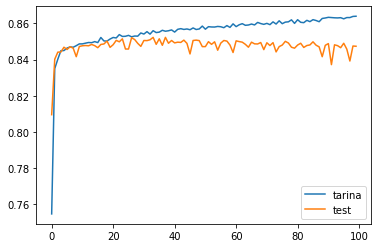

In [8]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

In [10]:
from tensorflow.keras.callbacks import LearningRateScheduler
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

history_lr_1 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate, history_lr_1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7458 - val_loss: 0.4311 - val_accuracy: 0.7601
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3664 - accuracy: 0.8267 - val_

Epoch 52/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3149 - accuracy: 0.8523 - val_loss: 0.3207 - val_accuracy: 0.8490
Epoch 53/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3149 - accuracy: 0.8518 - val_loss: 0.3207 - val_accuracy: 0.8492
Epoch 54/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3149 - accuracy: 0.8524 - val_loss: 0.3207 - val_accuracy: 0.8485
Epoch 55/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3149 - accuracy: 0.8524 - val_loss: 0.3208 - val_accuracy: 0.8487
Epoch 56/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3149 - accuracy: 0.8524 - val_loss: 0.3207 - val_accuracy: 0.8490
Epoch 57/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3148 - accuracy: 0.8520 - val_loss: 0.3211 - val_accuracy: 0.8491
Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3148 - accuracy: 0.8524 - val_loss: 0.3215 - val_accuracy:

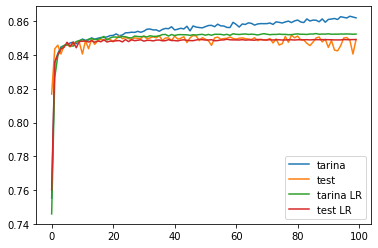

In [11]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")

plt.plot(history_lr_1.history['accuracy'], label = "tarina LR")
plt.plot(history_lr_1.history['val_accuracy'], label = "test LR")
plt.legend()
plt.show()

# Zad 
Naucz podobne moedele z optymalizatorem: 
```pythin
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```


# Adam

# Zad (dla chętnych)

Naucz podobne moedele z optymalizatorem: 

```pythin
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```